# **Fundamentals of Data Science - Winter Semester 2023**


#### Prof. Fabio Galasso, Stefano D'Arrigo (TA), Edoardo De Matteis (TA), Daniele Trappolini (TA)
<galasso@di.uniroma1.it>, <darrigo@di.uniroma1.it> , <dematteis@di.uniroma1.it>, <daniele.trappolini@uniroma1.it>

## **#2 Homework: Classification**


-----------------------------------

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary.*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

**galasso@di.uniroma1.it** , **darrigo@di.uniroma1.it**, **dematteis@di.uniroma1.it**, and **daniele.trappolini@uniroma1.it** **by Monday, November 27th, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Resgression with Gradient Ascent** *(10 points)*
  * **Question 1.1: Log-likelihood and Gradient Ascent rule**
  * **Question 1.2: Implementation of Logistic Regression with Gradient Ascent**
  * **Question 1.3: Report**

* **Question 2: Logistic Regression with non linear boundaries** *(10 points)*
  * **Question 2.1: Polynomial features for logistic regression**
  * **Question 2.2: Plot the computed non-linear boundary**
  * **Question 2.3: Report**

* **Question 3: Multinomial Classification** *(10 points)*
  * **Question 3.1: Softmax Regression Model**
  * **Question 3.2: Coding**
  * **Question 3.3: Histogram Features Extraction**

* **BONUS Question 4: Transfer Learning on CIFAR-10** *(5 points)*
  * **Question 4.1: Train a KNN Classifier on CIFAR-10**
  * **Question 4.2: Train a Softmax Classifier on CIFAR-10**
  * **Question 4.3: Report**
  

**TOTAL POINTS ARE 35, BONUS QUESTION INCLUDED**

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

In [1]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import os
import math

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

## **Question 1: Logistic Regression with Gradient Ascent *(10 Points)***

### **Question 1.1: Log-likelihood and Gradient Ascent Rule *(4/10 Points)*** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**: 
\begin{align}
L(\theta) &= \prod^m_{i=1} {h_{\theta}(x^{(i)})^{y(i)} * (1-h_{\theta}(x^{(i)}))^{1-y^{(i)}}}
\end{align}

- **Log-Likelihood**: 

\begin{align}
l(\theta) &= \log(L(\theta)) = \sum^m_{i=1} {y^{(i)} * \log{h_{\theta}(x^{(i)})} + (1-y^{(i)}) * \log{(1-h_{\theta}(x^{(i)}))}}
\end{align}

- **Gradient of log-likelihood** (slide 5 p. 20):
\begin{align}
\frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i=1}^m( y^{(i)} - h_{\theta}(x^{(i)}) ) * x^{(i)}_j
\end{align}

- **Gradient update equation**: 
For  $j=0,...,n$:
\begin{equation}
\theta_j = \theta_j + \alpha * \sum_{i=1}^m( y^{(i)} - h_{\theta}(x^{(i)}) ) * x^{(i)}_j
\end{equation}

-------------------------------------------------------

### **Question 1.2: Implementation of Logistic Regression with Gradient Ascent *(4/10 Points)***

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.
The dataset used here is a customer service airline dataset, even if it is a toy dataset you will encounter some problems typical of real data.


**Do not write below this line just run it**

--------------------------------------------

In [3]:
# load data
df = pd.read_csv("data/Invistico_Airline.csv")
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
print(df["satisfaction"].value_counts())
print("-" * 30)
print(df["Customer Type"].value_counts())
print("-" * 30)
print(df["Type of Travel"].value_counts())
print("-" * 30)
print(df["Class"].value_counts())

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64


We can see how some values are not numerical, we first explore the data counting the number of unique values for each feature.
Then, we replace the categorical values with numerical ones.

In doing that, we also deal with null values, there are many ways to deal with null values, among which:
1. Replace with a default value. 
2. Replace them with the most frequent value for that feature.
3. Replace them with the mean or median value for that feature.

We opt for the mean value for each feature. 

In [5]:
# replace values with a number
df["satisfaction"] = df["satisfaction"].replace({"satisfied": 1, "dissatisfied": 0})
df["Customer Type"] = df["Customer Type"].replace(
    {"Loyal Customer": 1, "disloyal Customer": 0}
)
df["Type of Travel"] = df["Type of Travel"].replace(
    {"Business travel": 0, "Personal Travel": 1}
)
df["Class"] = df["Class"].replace({"Business": 0, "Eco": 1, "Eco Plus": 2})

# fill NaN values with mean
df["Arrival Delay in Minutes"].fillna(
    df["Arrival Delay in Minutes"].mean(), inplace=True
)
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


It is advisable to look at the distribution of the data you will be dealing with.

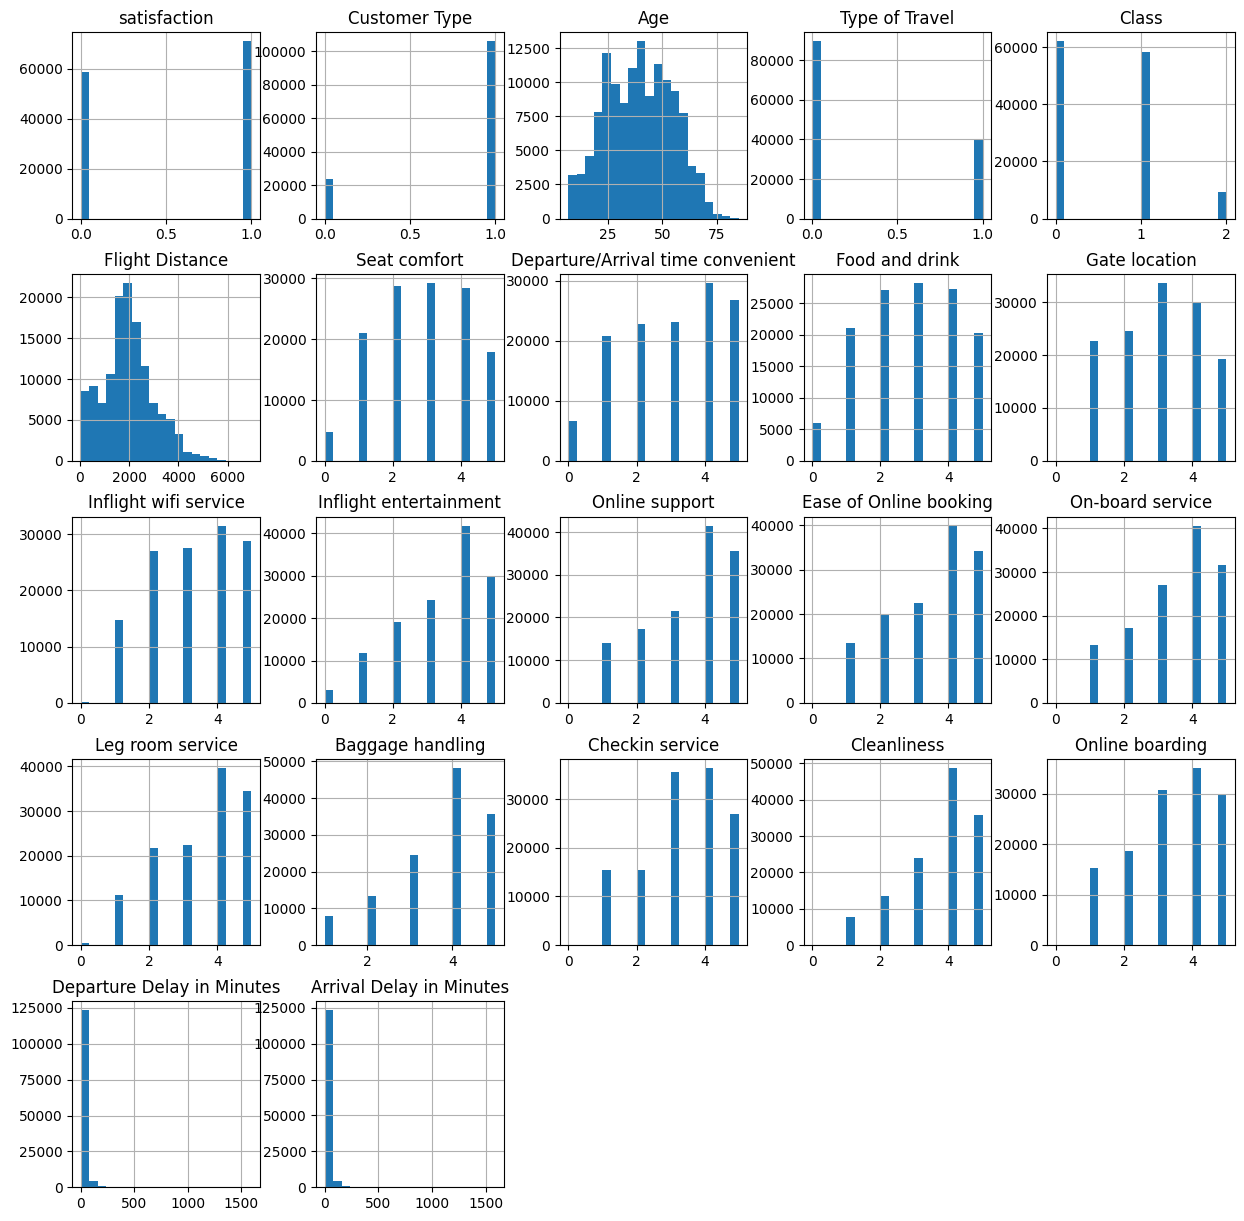

In [6]:
# Plot histograms for each variable
df.hist(figsize=(15, 15), bins=20)
plt.show()

In [7]:
df_small = df[["Flight Distance", "Leg room service", "satisfaction"]]
df_small.head()

,Flight Distance,Leg room service,satisfaction
0,265,0,1
1,2464,4,1
2,2138,3,1
3,623,0,1
4,354,0,1


Separate features from labels.

In [8]:
X, y = (df_small.drop(["satisfaction"], axis=1).values, df_small["satisfaction"].values)

It is recommended to normalize data when using gradient descent, we aim to have the data with mean $\mu=0$ and $\sigma=1$.

In [9]:
X = (X - X.mean()) / X.std()

<Axes: >

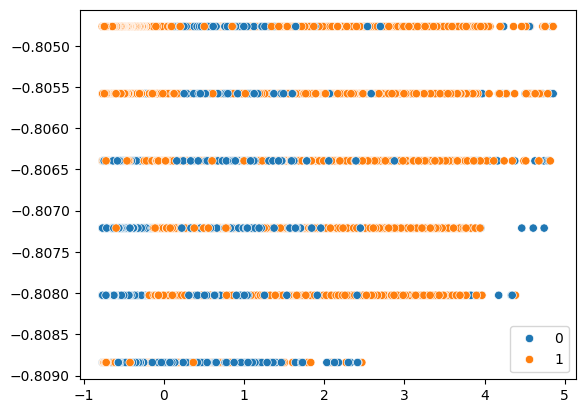

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

We add a column of 1's to $X$ to take into account the zero intercept.

In [11]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

Show the first and last 5 lines of $X$, now containing features $x_0$ (constant $1$), $x_1$ and $x_2$.

In [12]:
[
    x[:5, :],
    x[-5:, :],
]

[array([[ 1.        , -0.59286752, -0.80884172],
        [ 1.        ,  1.1993109 , -0.80558174],
        [ 1.        ,  0.93362188, -0.80639673],
        [ 1.        , -0.30109859, -0.80884172],
        [ 1.        , -0.52033278, -0.80884172]]),
 array([[ 1.        ,  0.60191809, -0.80639673],
        [ 1.        ,  0.89205703, -0.80639673],
        [ 1.        ,  1.08195133, -0.80639673],
        [ 1.        ,  1.18790094, -0.80721173],
        [ 1.        ,  2.70135038, -0.80476674]])]

Show the first and last 5 lines of y

In [13]:
[y[:5], y[-5:]]

[array([1, 1, 1, 1, 1], dtype=int64), array([1, 0, 0, 0, 0], dtype=int64)]

Define the sigmoid function `sigmoid`, the function to compute the gradient of the log likelihood  `grad_l` and the gradient ascent algorithm.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*


**Write your code below this line**

--------------------------------------------

In [14]:
def sigmoid(x):
    """
    Function to compute the sigmoid of a given input x.

    Args:
        x: it's the input data matrix.

    Returns:
        g: The sigmoid of the input x
    """
    #########################################
    #           INSERT YOUR CODE HERE       #
    #########################################

    g = 1 / (1 + np.exp(-x))

    return g


def log_likelihood(theta, x, y):
    """
    Function to compute the log likehood of theta according to data x and label y.

    Args:
        theta: it's the model parameter matrix.
        x: it's the input data matrix.
        y: the label array.

    Returns:
        log_l: the log likehood of theta according to data x and label y.
    """
    #########################################
    #           INSERT YOUR CODE HERE       #
    #########################################

    hyp = predictions(x, theta)
    #avoid taking log of zero
    firstTerm = y * np.log(hyp, out=np.zeros_like(hyp), where=(hyp!=0))
    secondTerm = (1-y) * np.log(1-hyp, out=np.zeros_like(1-hyp), where=(1-hyp!=0))
    log_l = np.mean( firstTerm + secondTerm )

    return log_l


def predictions(features, theta):
    """
    Function to compute the predictions for the input features.

    Args:
        theta: it's the model parameter matrix.
        features: it's the input data matrix.

    Returns:
        preds: the predictions of the input features.
    """
    #########################################
    #           INSERT YOUR CODE HERE       #
    #########################################

    preds = sigmoid( np.dot(features, theta) )

    return preds


def update_theta(theta, target, preds, feat, lr):
    """
    Function to compute the gradient of the log likelihood
    and then return the updated weights.

    Args:
        theta: the model parameter matrix.
        target: the label array.
        preds: the predictions of the input features.
        feat: it's the input data matrix.
        lr: the learning rate.

    Returns:
        theta: the updated model parameter matrix.
    """
    #########################################
    #           INSERT YOUR CODE HERE       #
    #########################################

    m = len(target)
    gradient = np.dot(feat.T, (target - preds)) / m
    theta += lr * gradient
    return theta

def gradient_ascent(theta, feat, target, lr, num_steps):
    """
    Function to execute the gradient ascent algorithm.

    Args:
        theta: the model parameter matrix.
        target: the label array.
        num_steps: the number of iterations.
        feat: the input data matrix.
        lr: the learning rate.

    Returns:
        theta: the final model parameter matrix.
        log_likelihood_history: the values of the log likelihood during the process.
    """
    #########################################
    #           INSERT YOUR CODE HERE       #
    #########################################

    #initial log_likelihood
    log_likelihood_history = [log_likelihood(theta, feat, target)]
    for _ in range(num_steps):
        preds = predictions(feat, theta)
        theta = update_theta(theta, target, preds, feat, lr)
        log_likelihood_history.append(log_likelihood(theta, feat, target))

    return theta, log_likelihood_history


**Do not write below this line just run it**

--------------------------------------------

**Check your grad_l implementation:**

`grad_l` applied to the `theta_test` (defined below) should provide a value for `log_l_test` close to the `target_value` (defined below).
In other words, `error_test` should be 0, up to machine error precision.

In [15]:
target_value = -1.1404441213525176
output_test = log_likelihood(np.array([-1, 0, 1]), x, y)
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)

Error:  0.0


**Synthetic dataset**

Let's first test our implementation on a synthetic dataset.

In [16]:
X_, y_ = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=1,
)
x_ = np.hstack([np.ones((X_.shape[0], 1)), X_])
x_.shape, y_.shape

((500, 3), (500,))

<Axes: >

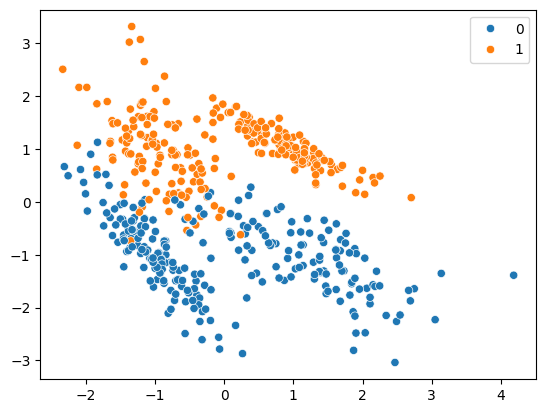

In [17]:
sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=y_)

In [18]:
# Initialize theta0
theta0 = np.random.normal(0, 0.01, x_.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x_, y_, lr=0.5, num_steps=n_iter)

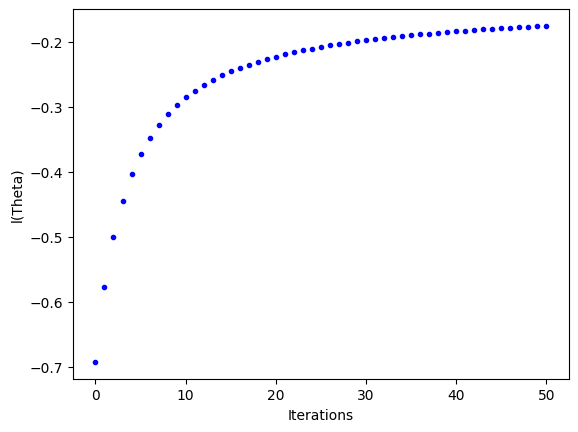

In [19]:
fig, ax = plt.subplots(num=2)

ax.set_ylabel("l(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history)), log_l_history, "b.")

Let's plot the data and the decision boundary, you should see a line separating the two classes.

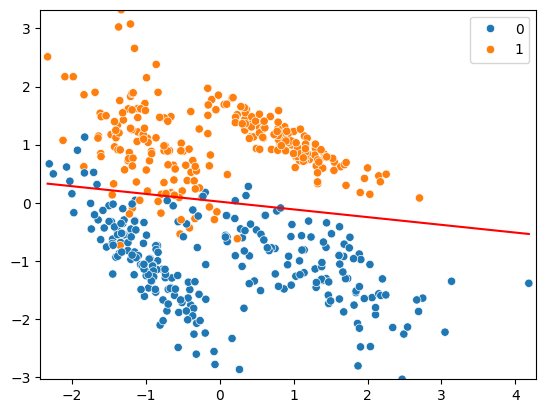

In [20]:
# Plot raw data
sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=y_)

# # Define range of x values
x_range = np.array([np.min(X_[:, 0]), np.max(X_[:, 0])])
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
# set the limits of the plot to the limits of the data
plt.xlim(np.min(X_[:, 0]) - 0.1, np.max(X_[:, 0] + 0.1))
plt.ylim(np.min(X_[:, 1]) - 0.001, np.max(X_[:, 1] + 0.001))
pass

**Real dataset**

Now we come back to the real dataset, we will see how things get harder in the real world.

We sample our $\theta_0$ from $\mathcal{N}(0,1e-2)$.

Let's apply the function gradient_ascent and print the final theta as well as theta_history:

In [21]:
# Initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


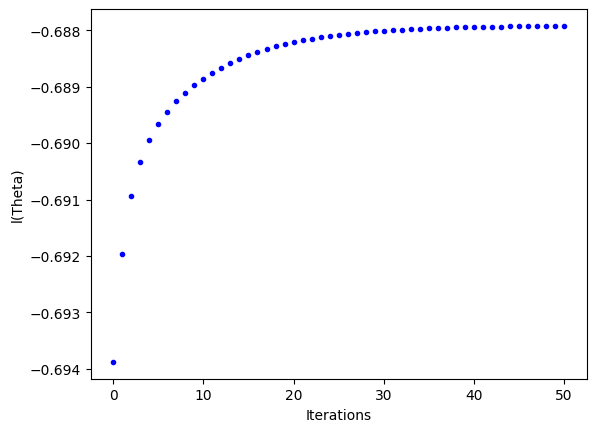

In [22]:
fig, ax = plt.subplots(num=2)

ax.set_ylabel("l(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history)), log_l_history, "b.")

Plot the data and the decision boundary:

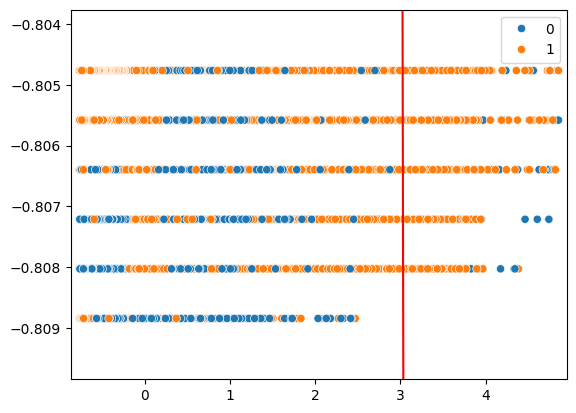

In [23]:
# Plot raw data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# # Define range of x values
x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
# set the limits of the plot to the limits of the data
plt.xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
plt.ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
pass

### **Question 1.3: Report *(2/10 Points)***

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?
5. We have choosen two features to train our model, but it does not mean that those are the best features to use. Try to use different features, at least two other pairs, and see if you can get a better or worse decision boundary, commenting the results you get.

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Since the log-likelihood tells us the probability of finding the target $\overrightarrow{y}$ given the feature matrix $X$ parametrized by $\theta$, we want to maximixe such probability. Hence we're looking for a local (possibly global) maximum of the log-likelihood function.

2. We could have used gradient descent to solve this problem by simply considering the negative of the log-likelihood. In such case, the goal would be to minimize its value (in order to maximize its opposite), therefore we could apply gradient descent. 
If we were instead to apply the gradient descent rule without modifying anything else we wouldn't get a good result, since the shape of the log-likelihood function is a concave curve: the gradient points towards the direction of the steepest ascent (to reach a local maximum), so gradient descent would proceed in the opposite direction, thus never getting to the desired value.

3. The higher the number of iterations, the more precise the decision boundary: at each iteration the values of $\theta$ are optimized according to the direction of the log-likelihood gradient. However, after the updating function converges (when it reaches a local maximum of log-likelihood), the parameters don't change anymore and the decision boundary stays the same. With small learning rate $\alpha$ (such as $\alpha = 0.01$), more updating steps are needed to reach convergence, so without a sufficient number of iterations the decision boundary is not optimal (e.g. 50 iterations aren't sufficient). If $\alpha$ is too big, instead, the program can't reach the maximum of the log-likelihood function, since too large steps are taken on the concave curve (it just bounces from one side to another), so the decision boundary is very bad. The screenshots below reflect such situation, referring to $\alpha = 100$.

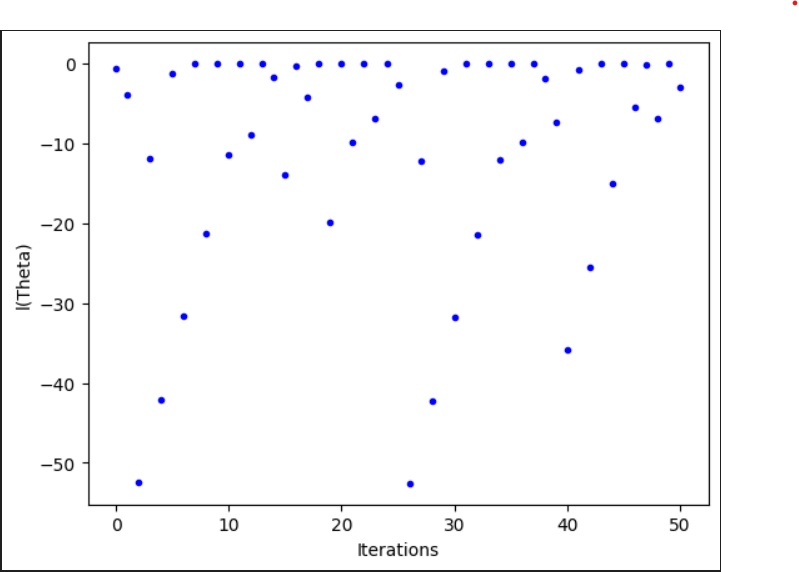

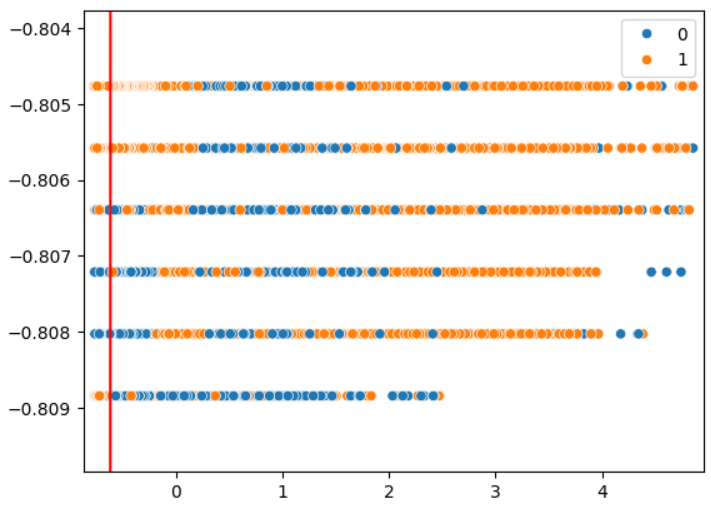

4. When data isn't normalized, we get an overflow error by the sigmoid function. This is due to the fact that, without normalization, the scales of the two features being considered are much different: *flight distance* ($x_1$) ranges from 0 to 6000 whereas *leg room service* ($x_2$) has values in {0,1,2,3,4,5}. Even small increments in the values of the parameters matrix $\theta$  can cause large increments in the product $\theta_1 * x_1$, leading to very big values that produce an overflow when exponentiated by the sigmoid function. 

5. We try to use different features for the classification task leveraging the *classifyAndPlotOnePThree* function implemented below. Choosing the pair of features ("Ease of Online booking","Food and drink") we get a higher final value for the log-likelihood (around -0.59 against the -0.688 with the original features choice), as well as with the pair ("Arrival Delay in Minutes","Baggage handling"), resulting in a slightly better decision boundary. 
The best results for the log likelihood that we were able to get (around -0.50) were obtained with the following choices of features: ("Inflight entertainment","Ease of Online booking"), ("Inflight entertainment","Leg room service") and ("Inflight entertainment","On-board service"). In the relative plot of the raw data, we may observe that most of the people that enjoyed the inflight entartainemnt were also satisfied with the flight experience, and since this places a great amount of the positive examples in the same area, the identification of the decision boundary is facilitated.


*(feel free to add here screenshots or new code cells if needed)*

-------------------------------------------------------

(array([ 0.18966457, -0.02362602, -0.01143388]), -0.6885309186255272)

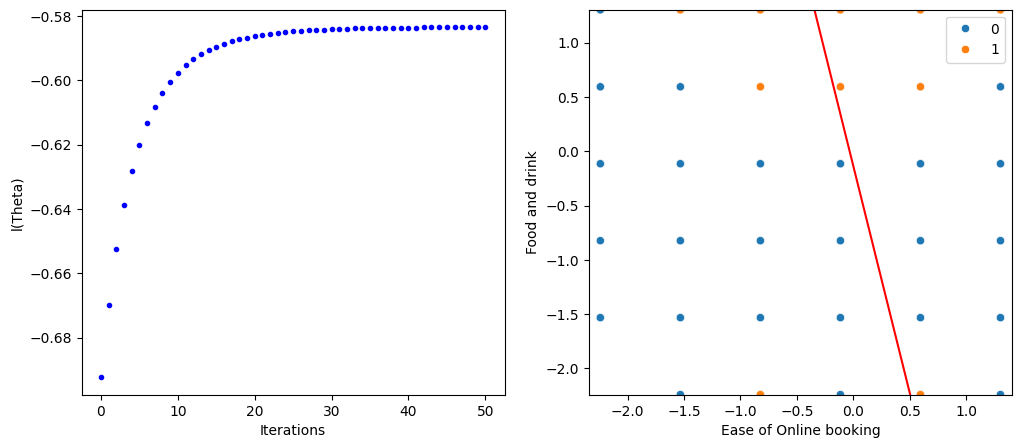

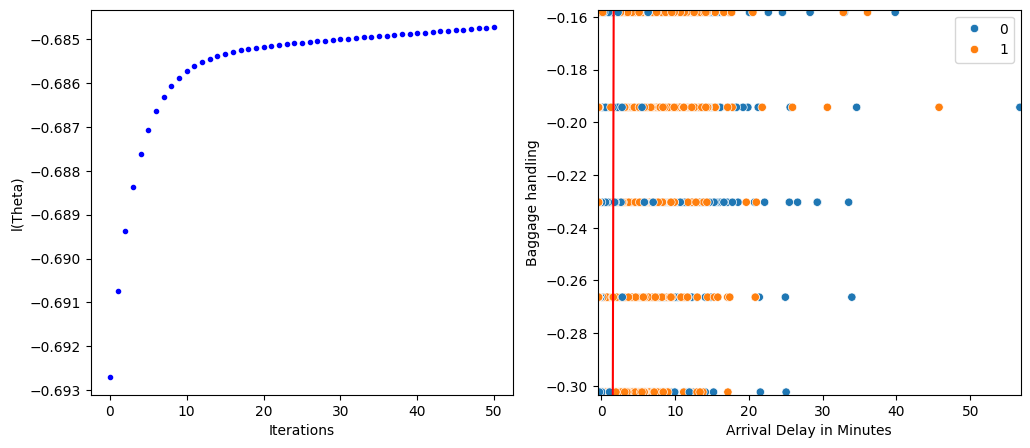

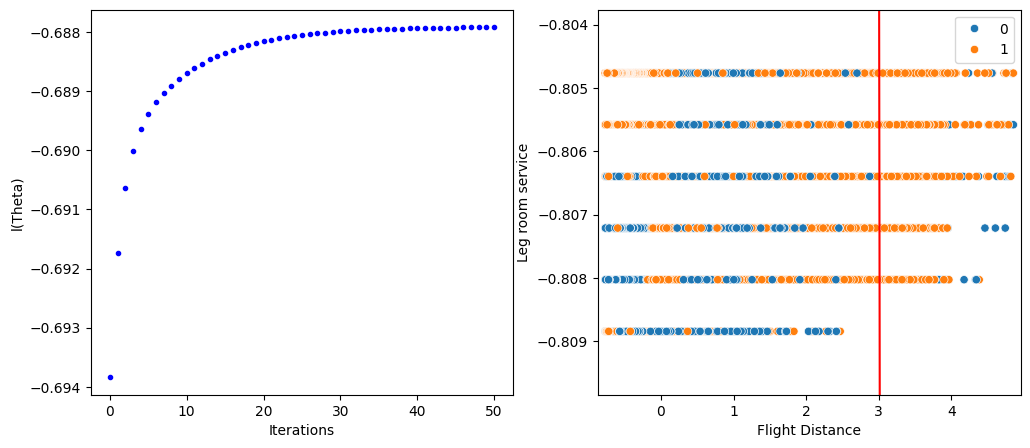

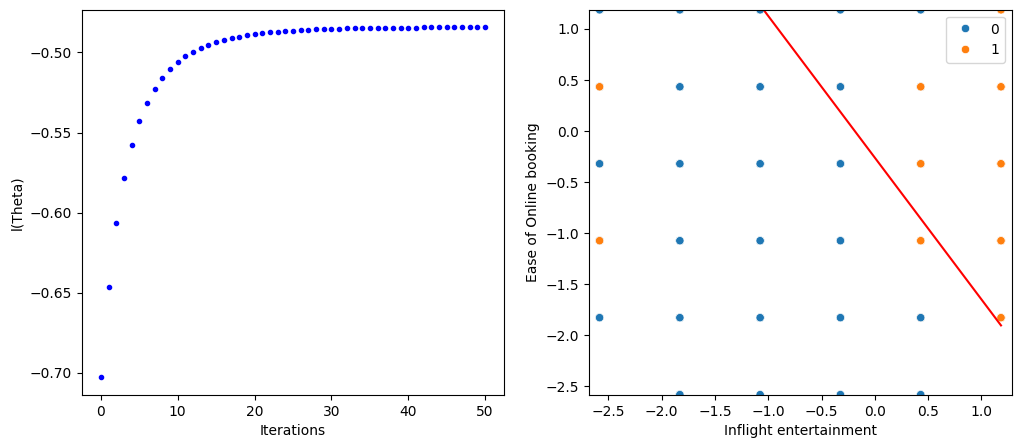

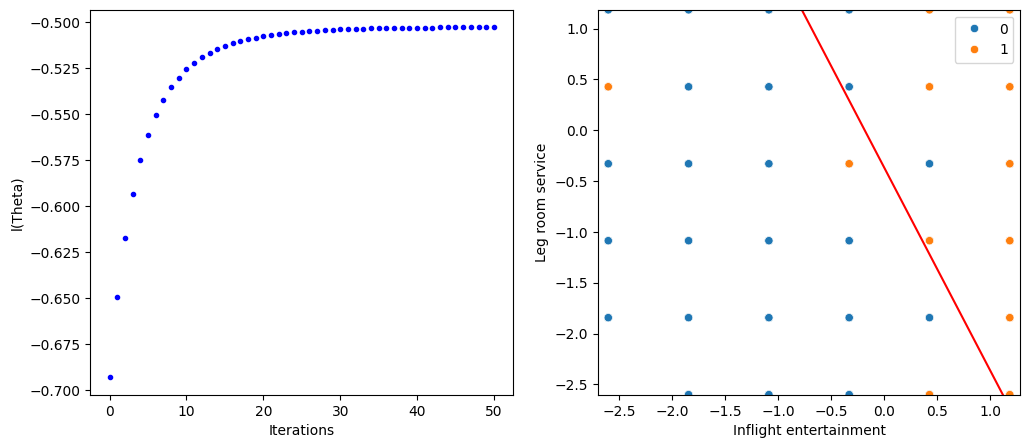

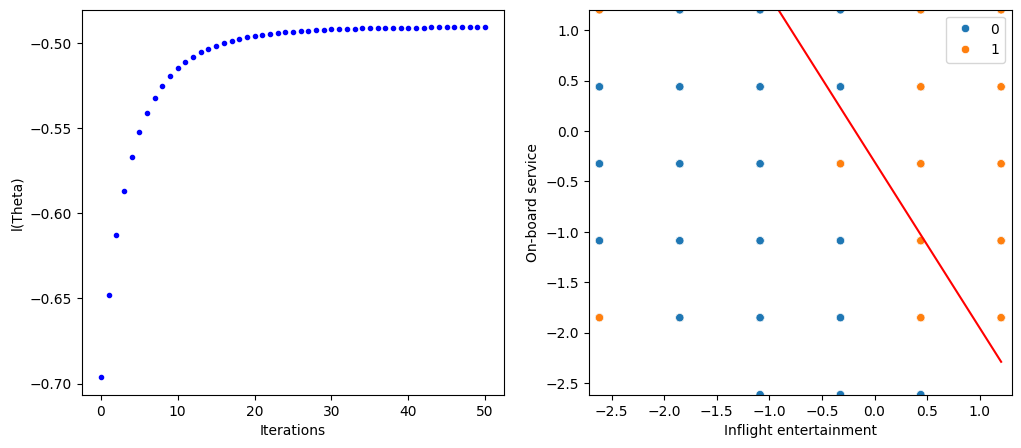

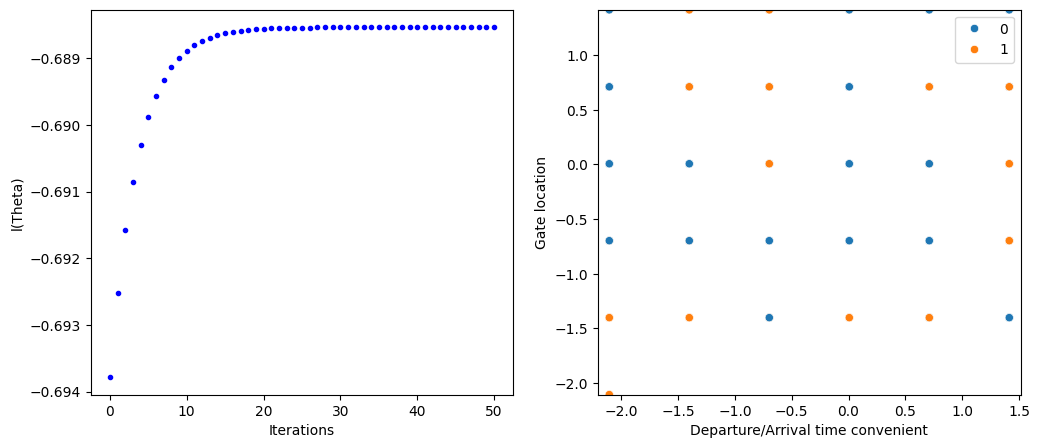

In [24]:
#LIST of FEATURES
#Customer Type
#Age
#Type of Travel
#Class
#Flight Distance
#Seat comfort
#Departure/Arrival time convenient
#Food and drink
#Gate location
#Inflight wifi service
#Inflight entertainment
#Online support 
#Ease of Online booking
#On-board service
#Leg room service
#Baggage handling
#Checkin service
#Cleanliness
#Online boarding
#Departure Delay in Minutes
#Arrival Delay in Minutes

#code for finding best features

#featuresL=["Customer Type","Age","Type of Travel","Class","Flight Distance","Seat comfort","Departure/Arrival time convenient","Food and drink","Gate location","Inflight wifi service",
#           "Inflight entertainment","Online support","Ease of Online booking","On-board service","Leg room service","Baggage handling","Checkin service","Cleanliness","Online boarding",
#           "Departure Delay in Minutes","Arrival Delay in Minutes"]

#bestL=[1,1,1]
#feat1=["a","a","a"]
#feat2=["a","a","a"]
#for i in range(len(featuresL)):
#    for j in range((i+1),len(featuresL)):
#        _,tempL=classifyAndPlotOnePThree(featuresL[i],featuresL[j])
#        if(tempL<max(bestL)):
#            index=np.argmax(bestL)
#            bestL[index]=tempL
#            feat1[index]=featuresL[i]
#            feat2[index]=featuresL[j]

#print(feat1,feat2,bestL)

def classifyAndPlotOnePThree(feature1,feature2) :
    """
    Function to do classification and plot results based on a specific selection of two features

    Args:
        feature1: the  name of the first feature to consider
        feature2: the  name of the first feature to consider

    Returns:
        theta_final: the final model parameter matrix.
    """
     
    df_small = df[[feature1, feature2, "satisfaction"]]
    X, y = (df_small.drop(["satisfaction"], axis=1).values, df_small["satisfaction"].values)
    X = (X - X.mean()) / X.std()
    x = np.hstack([np.ones((X.shape[0], 1)), X])

    # Initialize theta0
    theta0 = np.random.normal(0, 0.01, x.shape[1])

    # Run Gradient Ascent method
    n_iter = 50
    theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)

    fig, ax = plt.subplots(1,2)

    fig.set_figheight(5)
    fig.set_figwidth(12)

    ax[0].set_ylabel("l(Theta)")
    ax[0].set_xlabel("Iterations")
    ax[1].set_xlabel(feature1)
    ax[1].set_ylabel(feature2)
    ax[0].plot(range(len(log_l_history)), log_l_history, "b.")

    # Plot raw data
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

    # # Define range of x values
    x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
    ax[1].plot(x_range, y_range, c="red")
    # set the limits of the plot to the limits of the data
    plt.xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
    plt.ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
    plt.show

    return theta_final,log_l_history[-1]

classifyAndPlotOnePThree("Ease of Online booking","Food and drink")
classifyAndPlotOnePThree("Arrival Delay in Minutes","Baggage handling")
classifyAndPlotOnePThree("Flight Distance","Leg room service")

classifyAndPlotOnePThree("Inflight entertainment","Ease of Online booking")
classifyAndPlotOnePThree("Inflight entertainment","Leg room service")
classifyAndPlotOnePThree("Inflight entertainment","On-board service")

classifyAndPlotOnePThree("Departure/Arrival time convenient","Gate location")
        

## **Question 2: Logistic Regression with non linear boundaries *(10 points)***

### **Question 2.1: Polynomial features for logistic regression *(4/10 Points)*** 

Define new features e.g., of $2-$nd and $3$-rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

In [25]:
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=5,
)
X, X_test, y, y_test = train_test_split(X, y, test_size=200, random_state=42)

X.shape, y.shape

((500, 2), (500,))

In [26]:
x = np.hstack([np.ones((X.shape[0], 1)), X])
x_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

<Axes: >

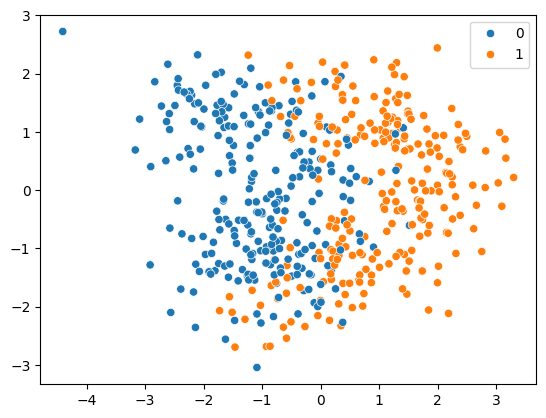

In [27]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [28]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:, 1]
x2 = x[:, 2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(f"x:\n{x[:5, :]}\n{'-'*40}")  # For visualization of the first 5 values
print(f"x1:\n{x1[:5, :]}\n{'-'*40}")  # For visualization of the first 5 values
print(f"x2:\n{x2[:5, :]}")  # For visualization of the first 5 values

x:
[[ 1.          0.03442384  2.19638976]
 [ 1.         -2.40887036  0.56635599]
 [ 1.         -2.5819359   1.03896962]
 [ 1.          1.99924792 -1.5903458 ]
 [ 1.         -0.91810318 -0.14326978]]
----------------------------------------
x1:
[[ 0.03442384]
 [-2.40887036]
 [-2.5819359 ]
 [ 1.99924792]
 [-0.91810318]]
----------------------------------------
x2:
[[ 2.19638976]
 [ 0.56635599]
 [ 1.03896962]
 [-1.5903458 ]
 [-0.14326978]]


**Write your code below this line**

--------------------------------------------

In [29]:
def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features
        degree: the degree of the polynomial

    Returns:
        X: the final polynomial features
    """
    if degree < 2:
        return X

    features = np.ones(X[:, 1].shape[0])

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    import itertools

    #uncomment these lines to check correctness
    #features=np.ones(3)
    #X=np.array([[1,2,3],[1,2,3],[1,2,3]])

    #reshape feature to be able to use it in conjunction with hstack
    features = features.reshape(features.shape[0], 1)

    #get the number of the actual features of X
    featureQnty = X.shape[1]-1

    for deg in range(1,degree+1):

        #get all the possible exponents of the columns and order them to have the highest exponent in the first position
        exponents=reversed(np.arange(deg+1))

        #take all the possible combinations of exponents that sum to deg (number partition)
        for combination in itertools.combinations_with_replacement(exponents,featureQnty):
            if np.sum(combination)==deg :

                #consider all unique permutations of the combinations
                for permutation in list(dict.fromkeys(itertools.permutations(combination))):

                    #exponentiate each column with the respective exponent, multiply column-wise and reshape to be compatible with hstack
                    features=np.hstack([features,np.prod(np.power(X[:,1:],permutation),axis=1).reshape(X.shape[0],1)])

    return features


**Do not write below this line just run it**

--------------------------------------------

In [30]:
x_new_quad = get_polynomial(x, degree=2)
x_new_cubic = get_polynomial(x, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

In [31]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

theta_final_quad, log_l_history_quad = gradient_ascent(
    theta0_quad, x_new_quad, y, lr=0.5, num_steps=n_iter
)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, log_l_history_cubic = gradient_ascent(
    theta0_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter
)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[-0.43978581  1.99723372  0.11087099 -0.04025729  0.43849441  0.1660294 ]
[-0.55060145  0.82985382  0.17380083 -0.06126948  0.51224138  0.09479032
  0.85995142  0.06307569 -0.45655109  0.03263208]


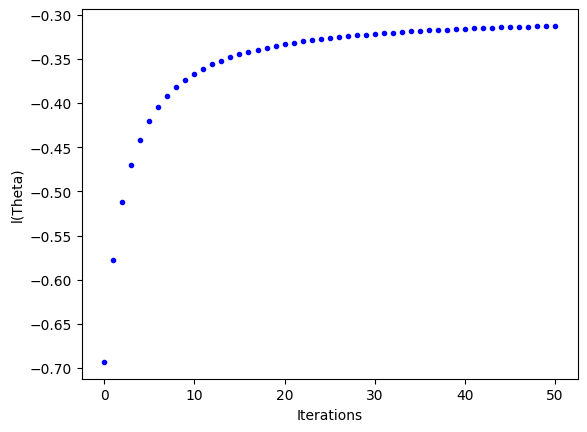

In [32]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig, ax = plt.subplots(num=2)

ax.set_ylabel("l(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history_quad)), log_l_history_quad, "b.")

### **Question 2.2: Plot the computed non-linear boundary *(4/10 Points)*** 



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

**Write your code below this line**

--------------------------------------------

In [33]:
def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """

    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    x1_vec_flat = np.vstack(x1_vec.flatten())
    x2_vec_flat = np.vstack(x2_vec.flatten())

    X = np.hstack([x1_vec_flat, x2_vec_flat])
    X = np.hstack([np.ones((X.shape[0], 1)), X])

    features = get_polynomial(X, degree)
    f = np.matmul(features, theta_final)

    return x1_vec, x2_vec, f


**Do not write below this line just run it**

--------------------------------------------

Now plot the decision boundaries corresponding to the `theta_final_quad` and `theta_final_cubic` solutions.

In [34]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
    plt.contour(
        x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]
    )
    plt.show()

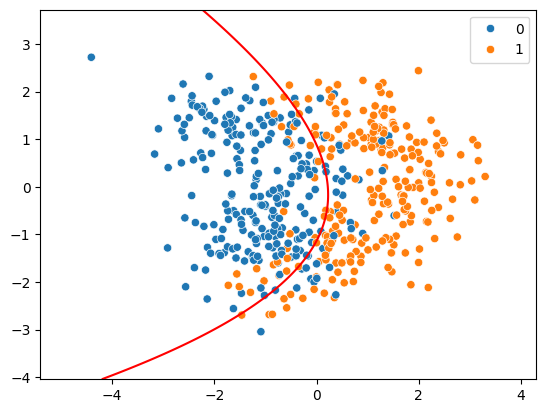

In [35]:
plot_boundary_function(X, y, theta_final_quad, degree=2)

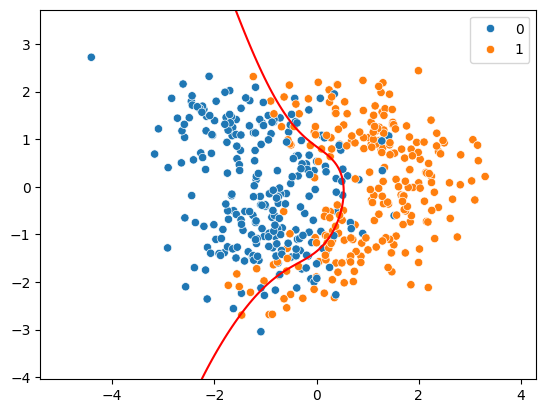

In [36]:
plot_boundary_function(X, y, theta_final_cubic, degree=3)

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy.

In [37]:
def fit_polynomial(X, y, degree, lr, num_steps):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features
        y: the target values
        degree: the degree of the polynomial
        lr: the learning rate
        num_steps: the number of iterations

    Returns:
        theta_final: the final model parameter matrix
        log_l_history: the values of the log likelihood during the process
    """

    x_new = get_polynomial(X, degree=degree)

    # Initialize theta0
    theta0 = np.zeros(x_new.shape[1])

    # Run Gradient Ascent method
    theta_final, _ = gradient_ascent(theta0, x_new, y, lr=lr, num_steps=num_steps)

    return theta_final, x_new


def predict(x, theta):
    z = np.dot(x, theta)
    probabilities = sigmoid(z)
    y_hat = np.array(list(map(lambda x: 1 if x > 0.5 else 0, probabilities)))
    return y_hat


def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        theta, x_new = fit_polynomial(X, y, degree, lr, num_steps)
        thetas += [theta]
        y_hat_train = predict(x_new, theta)
        accuracy_scores_train += [accuracy_score(y, y_hat_train)]
        y_hat_test = predict(get_polynomial(X_test, degree=degree), theta)
        accuracy_scores_test += [accuracy_score(y_test, y_hat_test)]

    return thetas, accuracy_scores_train, accuracy_scores_test

In [38]:
degrees = np.arange(1, 20) #degrees = np.arange(1, 12)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    x, y, x_test, y_test, degrees=degrees, lr=0.5, num_steps=1000
)

 11%|█         | 2/19 [00:00<00:03,  4.59it/s]

100%|██████████| 19/19 [00:11<00:00,  1.65it/s]


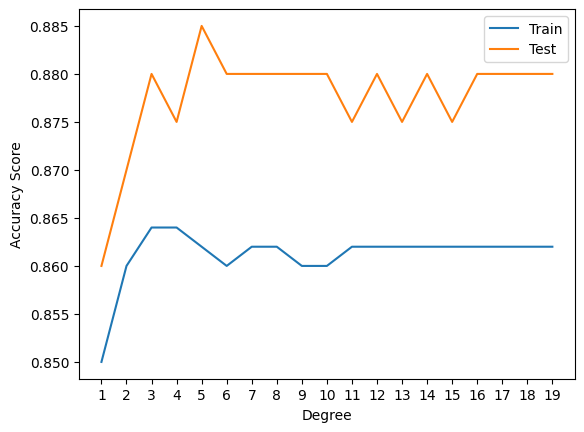

In [39]:
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test, label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

**Write your code below this line**

--------------------------------------------

Plot the best and the worst decision boundaries.

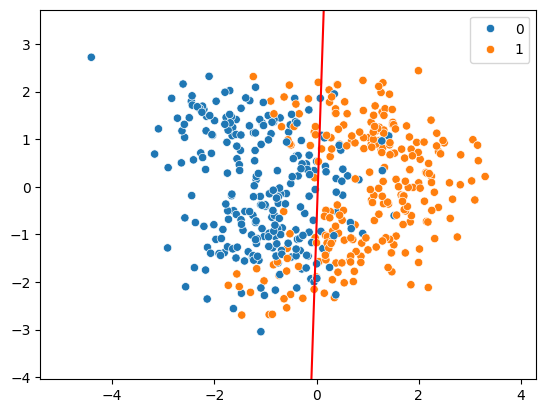

Degree: 1 Accuracy scores train: 0.85 Accuracy scores test: 0.86


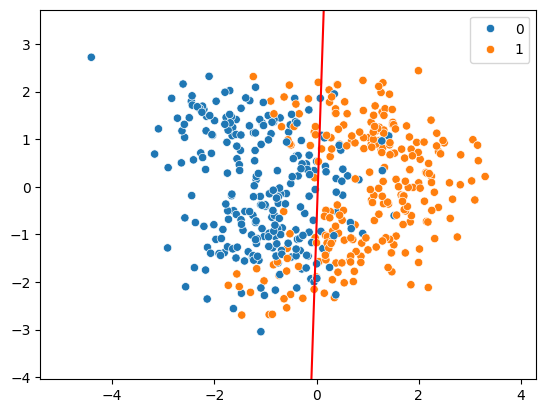

Degree: 2 Accuracy scores train: 0.86 Accuracy scores test: 0.87


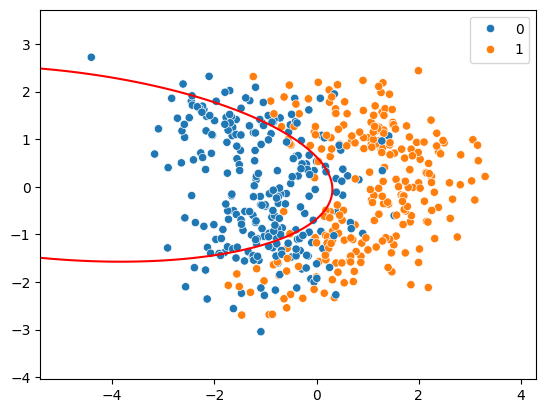

Degree: 3 Accuracy scores train: 0.864 Accuracy scores test: 0.88


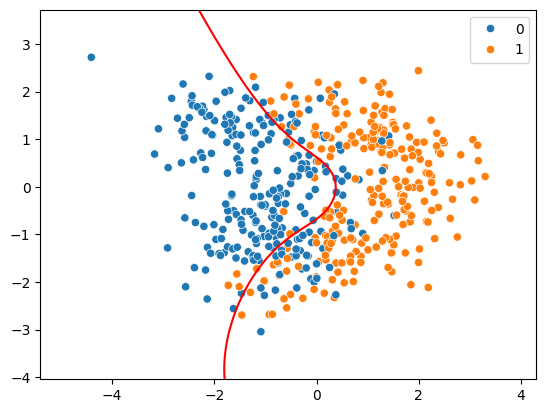

Degree: 4 Accuracy scores train: 0.864 Accuracy scores test: 0.875


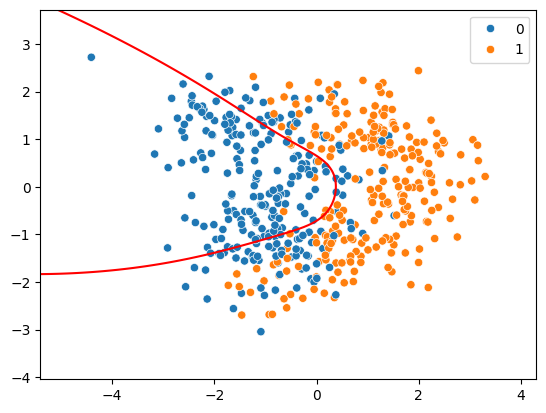

Degree: 5 Accuracy scores train: 0.862 Accuracy scores test: 0.885


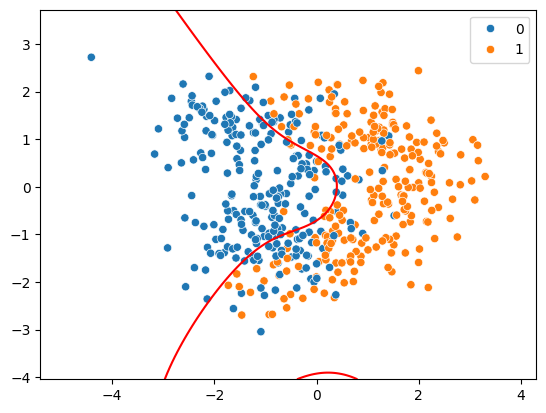

Degree: 6 Accuracy scores train: 0.86 Accuracy scores test: 0.88


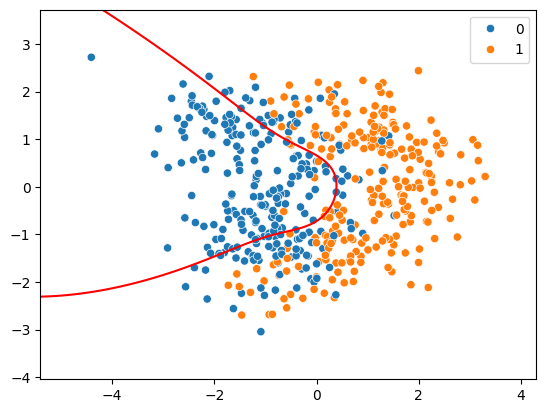

Degree: 7 Accuracy scores train: 0.862 Accuracy scores test: 0.88


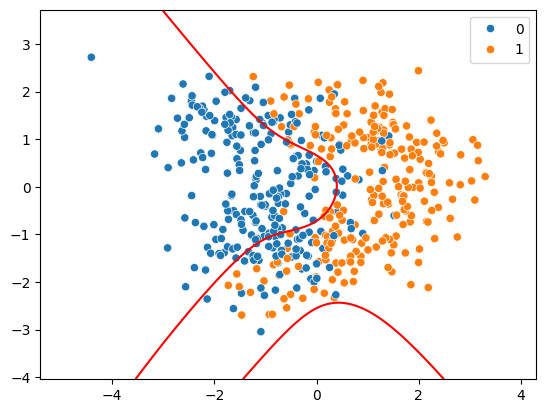

Degree: 8 Accuracy scores train: 0.862 Accuracy scores test: 0.88


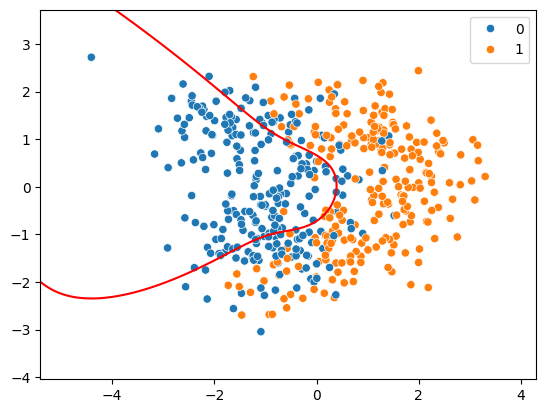

Degree: 9 Accuracy scores train: 0.86 Accuracy scores test: 0.88


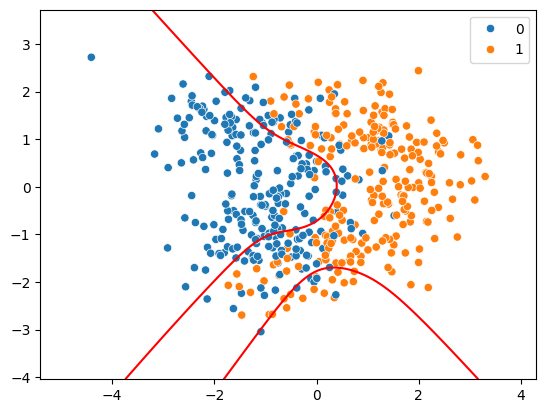

Degree: 10 Accuracy scores train: 0.86 Accuracy scores test: 0.88


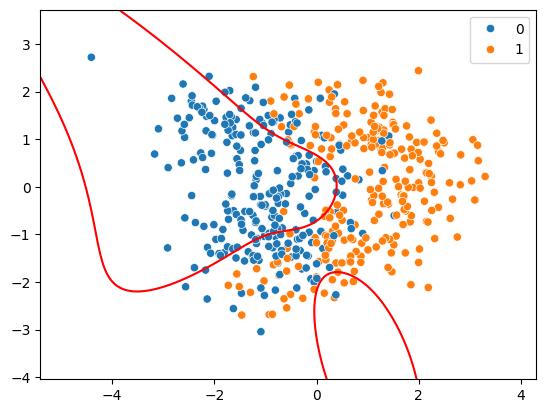

Degree: 11 Accuracy scores train: 0.862 Accuracy scores test: 0.875


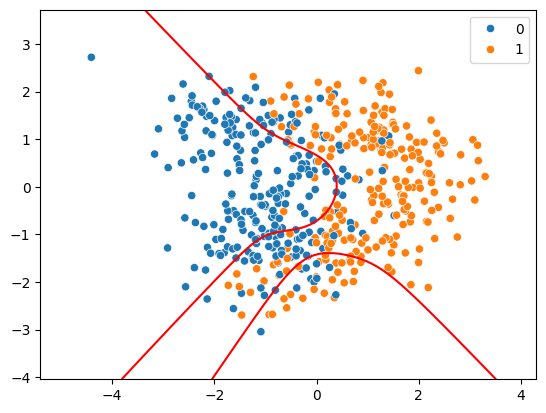

Degree: 12 Accuracy scores train: 0.862 Accuracy scores test: 0.88


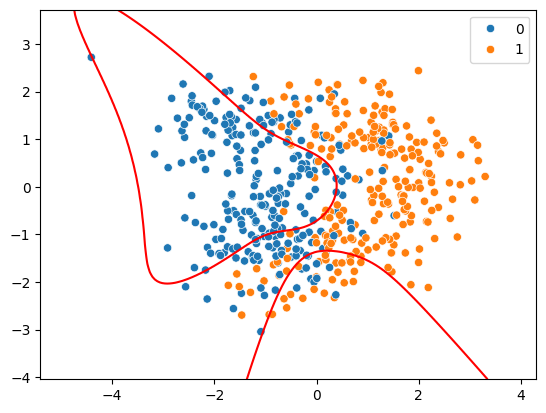

Degree: 13 Accuracy scores train: 0.862 Accuracy scores test: 0.875


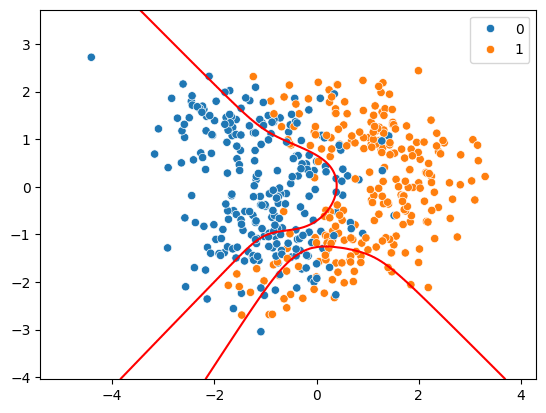

Degree: 14 Accuracy scores train: 0.862 Accuracy scores test: 0.88


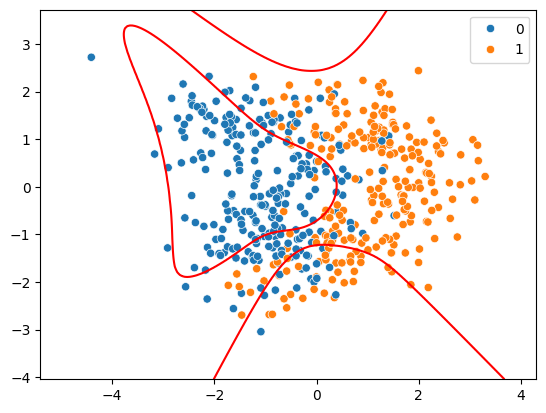

Degree: 15 Accuracy scores train: 0.862 Accuracy scores test: 0.875


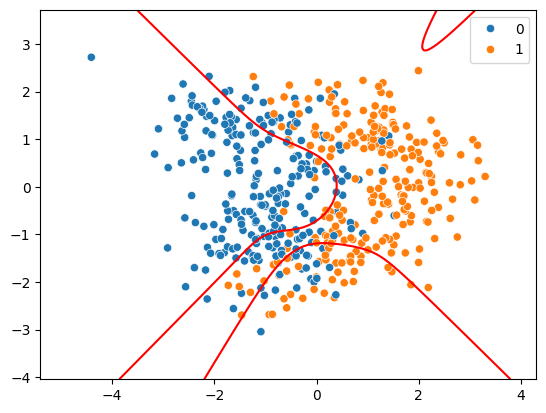

Degree: 16 Accuracy scores train: 0.862 Accuracy scores test: 0.88


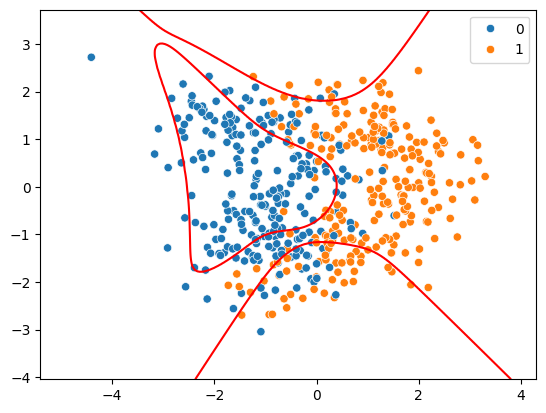

Degree: 17 Accuracy scores train: 0.862 Accuracy scores test: 0.88


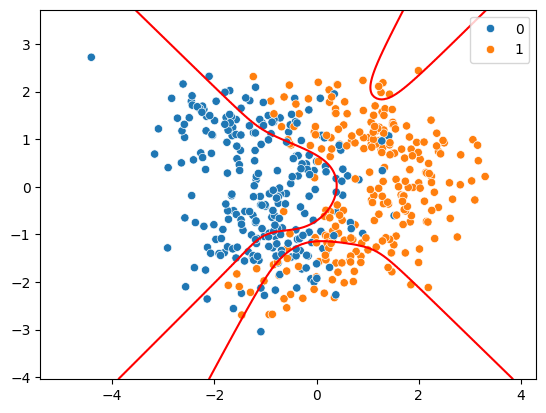

Degree: 18 Accuracy scores train: 0.862 Accuracy scores test: 0.88


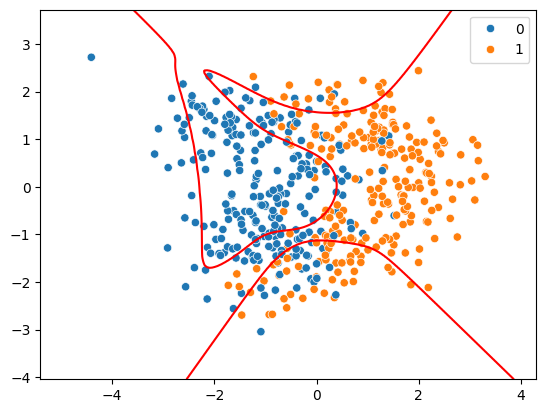

Degree: 19 Accuracy scores train: 0.862 Accuracy scores test: 0.88


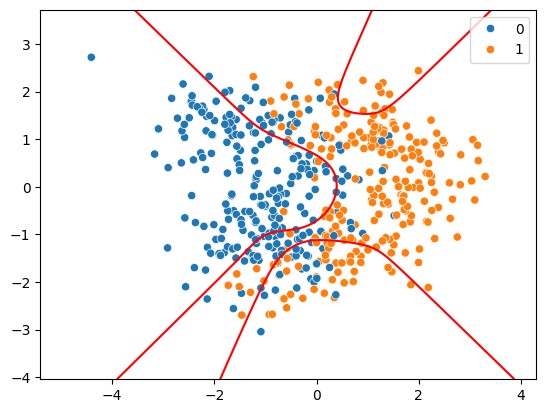

In [46]:
# Plot worst model

plot_boundary_function(X, y, thetas[0], degree=1)

"""for i in range(len(thetas)):
    print(f"Degree: {i+1} Accuracy scores train: {accuracy_scores_train[i]} Accuracy scores test: {accuracy_scores_test[i]}")
    plot_boundary_function(X, y, thetas[i], degree=i+1)"""


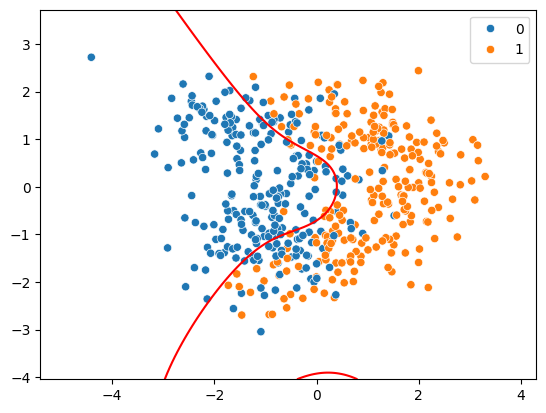

In [41]:
# Plot best model
plot_boundary_function(X, y, thetas[4], degree=5)

### **Question 2.3: Report *(2/10 Points)*** 



Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Regarding the differences bewteen the linear, quadratic and cubic decision boundaries, it can be seen that the cubic one has the best performance among the other two, due to its complex and more representative shape. Until a certain value, increasing the degree of the polynomial increases also the performance, in fact the 5 degree polynomial seems to be the best in the examples above. That said, if we increase the degree too much we are going to underfit (on the test set), and this can be seen in the plot of the accuracy scores and the correspondent degree. Watching at the accuracy-degree graph, even if we get to really big degree values, it seems to be stable and not decrease anymore after a certain value.

2. On the test set, the model seems to perform in general better than on the train set. This could be due to the different but similar distribution of the samples in the two datasets. The worst accuracy is obtained when the degree of the polynomial is the lowest possible, that is, 1 (and for this motivation the boundary is just a line that can't approximate very well the data). Instead, the best accuracy is obtained with a polynomial of degree 5. This seems to be the upperbound to the degree of the polynomial, because values higher than that downgrade the accuracy. For this purpose, it can be understood that a big but not too high degree of the polynomial is a better choice, because it generates a much more complex boundary, without losing of generality due to a too high value for the degree.



-------------------------------------------------------

## **Question 3: Multinomial Classification *(13 Points)***

### **Question 3.1: Softmax Regression Model *(4/10 Points)***

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) = ...
\end{align*}


\begin{align*}
\nabla_{\theta_k} L(\theta) = ...
\end{align*}


**Do not write below this line just run it**

--------------------------------------------

### **Question 3.2: Coding *(4/10 Points)***

Now we will implement the code for the equations. Let's implement the functions:
-  softmax 
-  CELoss
-  CELoss gradient
-  gradient descent

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [42]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

100%|██████████| 170498071/170498071 [01:55<00:00, 1471463.48it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

In [43]:
# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded


**Write your code below this line**

--------------------------------------------

In [44]:
def softmax(theta, X):
    """
    Function to compute associated probability for each sample and each class.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)

    Returns:
        softmax: it's the matrix containing probability for each sample and each class. The shape is (N, K)
    """
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    return softmax


def CELoss(theta, X, y_onehot):
    """
    Function to compute softmax regression model and Cross Entropy loss.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)
        y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Returns:
        loss: The scalar that is the mean error for each sample.
    """
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    return loss


def CELoss_jacobian(theta, X, y_onehot):
    """
    Function to compute gradient of the cross entropy loss with respect the parameters.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)
        y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Returns:
        jacobian: A matrix with the partial derivatives of the loss. The shape is (H, K)
    """
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    return jacobian


def gradient_descent(theta, X, y_onehot, alpha=0.01, iterations=100):
    """
    Function to compute gradient of the cross entropy loss with respect the parameters.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)
        y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)
        alpha: it's the learning rate, so it determines the speed of each step of the GD algorithm
        iterations: it's the total number of step the algorithm performs

    Returns:
        theta: it's the updated matrix of the parameters after all the iterations of the optimization algorithm. The shape is (H, K)
        loss_history: it's an array with the computed loss after each iteration
    """
    # We initialize an empty array to be filled with loss value after each iteration
    loss_history = np.zeros(iterations)

    # With a for loop we compute the steps of GD algo
    for it in range(iterations):
        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################
        pass

    return theta, loss_history


**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [45]:
# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions


# Prediction function
def predict(theta, X):
    probabilities = softmax(theta, X)
    return np.argmax(probabilities, axis=1)


# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_test = [img.reshape(-1).numpy() for img, _ in test_data]
X_test = np.array(X_test)
y_test = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_test)


# Initialize theta
H, K = X_train.shape[1], 10  # number of features and number of classes
theta = np.random.randn(H, K) * 0.001


# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
theta_optimized, loss_history = gradient_descent(
    theta, X_train, y_train_onehot, alpha, iterations
)


# Make predictions on the training and test data
train_predictions = predict(theta_optimized, X_train)
test_predictions = predict(theta_optimized, X_test)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_test)

# print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

AxisError: axis 1 is out of bounds for array of dimension 1

### **Question 3.3: Histogram Features Extraction *(2/10 Points)***

In this exercise, the goal is to implement a simple image classification procedure using the CIFAR-10 dataset. Instead of using the raw pixel values or advanced deep learning techniques, you will be extracting color histogram features from the images for classification purposes.

- Extract Color Histogram Features.
Implement the extract_histogram_features function. This function should process the dataset and convert each image into a set of histograms – one for each color channel (Red, Green, Blue).
Each histogram will serve as a feature for the classifier.

- Train a Logistic Regression Classifier.
Use the scikit-learn library to initialize and train a logistic regression classifier with the extracted histogram features.

- Evaluate the Classifier.
Use the trained classifier to predict the classes of both the training and test datasets.
Calculate and print the accuracy of the classifier for both datasets to gauge its performance.

Fill in the sections of the provided code marked with "YOUR CODE HERE". Ensure that the final pipeline is complete and functional.

In [ ]:
# Calculate pixel histograms
def extract_histogram_features(data, bins=30):
    """
    This function takes in a dataset and a number of "bins"
    and returns pixel histograms and the corresponding labels.

    Hint: Use the 'data' variable to access the images and their labels.

    Args:
        data: the input data
        bins: the number of bins

    Returns:
        histograms: the pixel histograms
        labels: the corresponding labels
    """
    #########################################
    #           INSERT YOUR CODE HERE       #
    #########################################
    return histograms, labels


**Do not write below this line just run it**

--------------------------------------------

In [ ]:
max_iter = 50

In [ ]:
train_features_hist, train_labels_hist = extract_histogram_features(train_data)
test_features_hist, test_labels_hist = extract_histogram_features(test_data)

# Train the classification model
clf = LogisticRegression(max_iter=max_iter)
clf.fit(train_features_hist, train_labels_hist)

# Performance evaluation
train_predictions_hist = clf.predict(train_features_hist)
test_predictions_hist = clf.predict(test_features_hist)

train_acc_hist = compute_accuracy(
    train_labels_hist, train_predictions_hist
)  # compute_accuracy
test_acc_hist = compute_accuracy(test_labels_hist, test_predictions_hist)

# print(f"Training accuracy: {train_acc_hist * 100:.2f}%")
print(f"Test accuracy: {test_acc_hist * 100:.2f}%")

### 3.3.2 AlexNet features extractions

Now, let's try extracting features using AlexNet, which is pretrained on ImageNet. For your convenience, we're providing the extracted features directly through this Google Drive link: 
https://drive.google.com/drive/folders/12QoP_8V1hSL2bRZXvZ2sbHm8MUOCbbaP?usp=sharing. 

You will need to retrain the logistic regression on these new features. After that, there will be a section on questions regarding the differing performances.


**Do not write below this line just run it**

--------------------------------------------

In [ ]:
# Load features and labels from disk
features_alex_net = "AlexNet"
train_features_alexnet = np.load(os.path.join(features_alex_net, "train_features.npy"))
train_labels_alexnet = np.load(os.path.join(features_alex_net, "train_labels.npy"))
test_features_alexnet = np.load(os.path.join(features_alex_net, "test_features.npy"))
test_labels_alexnet = np.load(os.path.join(features_alex_net, "test_labels.npy"))

# Train logistic regression
clf = LogisticRegression(max_iter=max_iter)
clf.fit(train_features_alexnet, train_labels_alexnet)

# Performance evaluation
train_predictions_alexnet = clf.predict(train_features_alexnet)
train_acc_alexnet = compute_accuracy(train_labels_alexnet, train_predictions_alexnet)

test_predictions_alexnet = clf.predict(test_features_alexnet)
test_acc_alexnet = compute_accuracy(test_labels_alexnet, test_predictions_alexnet)

# print(f"Training accuracy: {train_acc_alexnet * 100:.2f}%")
print(f"Test accuracy: {test_acc_alexnet * 100:.2f}%")

### 3.3.3 Performance Evaluation

Now, we aim to compare the performances obtained. 
Please note that this section is purely theoretical, you should execute the code provided below and then answer the questions that will be presented at the end of this section.

**Do not write below this line just run it**

--------------------------------------------

In [ ]:
# Compute diffusion matrix for Histogram Features example
conf_matrix_hist = confusion_matrix(test_labels_hist, test_predictions_hist)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_hist, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Histogram features based Performance")
plt.show()

# Compute diffusion matrix for AlexNet Features example
conf_matrix_alexnet = confusion_matrix(test_labels_alexnet, test_predictions_alexnet)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_alexnet, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Alexnet features based Performance")
plt.show()


**Answer the following questions**

--------------------------------------------

1. Provide a comment on the confusion matrix and try to give an explanation for why this happens?
2. Why is the accuracy higher when using raw pixels as input compared to when we use features extracted from the histogram?


**Write your answer below this line**

--------------------------------------------


1.
2.

--------------------------------------------

## **Question 4 (BONUS): Trasfer Learning on CIFAR-10 _(5 points)_**

**Transfer Learning (TL)** is a machine learning technique that consists in reusing a pre-trained model and its weights to perform a task similar to the one the model has been trained on. Pre-trained models are usually trained using large amounts of data and are really useful if you have just a small dataset to learn from.

In this bonus question you are going to leverage a pre-trained DNN, [**AlexNet**](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), trained on the IMAGENET dataset, in order to train two classification models on a different, smaller, dataset (CIFAR-10 in this case).

The dataset your are going to use is made of 50000 feature embeddings with 1024 dimensions obtained by encoding the images in CIFAR-10 with the pre-trained AlexNet. This means that your classifier is going to leverage the representation power of a relatively large DNN without the actual need to train in from scratch, which would require high GPU power and many hours/days of training.

For the most curious among you: at the end of the exercise you will find the actual code that we used to encode the CIFAR-10 dataset with AlexNet using the [**PyTorch**](https://pytorch.org/) framework. In case you wanted to run it, we suggest to either use Google Colab with the runtime set to GPU (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relative capable GPU (minimum 4GB of VRAM).

**Do not write below this line, just run it**

--------------------------------------------

In [ ]:
# import libraries and set seed
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

np.random.seed(123)

In [ ]:
# load the train and test datasets
X_train = np.load("./data/processed_data/X_train.npy")
y_train = np.load("./data/processed_data/y_train.npy")
y_onehot_train = np.load("./data/processed_data/y_onehot_train.npy")

X_test = np.load("./data/processed_data/X_test.npy")
y_test = np.load("./data/processed_data/y_test.npy")

In [ ]:
# Shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_onehot_train shape:", y_onehot_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

### **Question 4.1: Train a KNN Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a KNN Classification model using the pre-processed and encoded CIFAR-10 dataset (given by us).

The encoded dataset is made of 50000 feature embeddings with 1024 dimensions. The labels are encoded as integers in the range [0,9], they will serve as the target of your classifier.

KNN is a simple and intuitive classification algorithm that works by assigning a label to a new sample based on the labels of the K nearest samples in the training set. The label is the one that appears the most among the K nearest samples.


**HINTS:** 
* You will have to train the KNN classifier on the training set by trying different values of K. At the end you will have to report the accuracy of your model on the test set for the best value of K.
* You **must** use sklearn.neighbors.KNeighborsClassifier to train your model. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# subsampling data
num_training = 10000
mask = list(range(num_training))
X_train_sub = X_train[mask]
y_train_sub = y_train[mask]

In [ ]:
k_range = range(5, 11)
scores = {}
scores_list = []

**Write your code below this line**

--------------------------------------------

In [ ]:
##############################################
#           INSERT YOUR CODE HERE             #
##############################################

**Do not write below this line, just run it**

--------------------------------------------

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**Do not write below this line, just run it**

--------------------------------------------

In [ ]:
# now pick the best k and train on the whole training set
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# print the accuracy
print(metrics.accuracy_score(y_test, y_pred))

### **Question 4.2: Train a Softmax Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a Softmax Regression Model using the pre-processed and encoded CIFAR-10 dataset (given by us) and the code written by you in Question 3.2.

Here you have to write the code to train your Softmax Regression Model.  
Your function has to return the inital theta, the learned theta, and the loss history.  
You can evaluate its performance with the code below.

**HINT:** Experiment with different alpha's with a small number of iterations to keep the training time low. Once you find the best alpha you can train your model for as long as needed.

**Write your code below this line**

--------------------------------------------

In [ ]:
def fit_softmax_classifier(X_train, y_onehot_train, alpha, n_iter):
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    return theta0, theta_final, log_l_history

**Do not write below this line, just run it**

--------------------------------------------

In [ ]:
theta0, theta_final, log_l_history = fit_softmax_classifier(
    X_train, y_onehot_train, alpha=1e4, n_iter=1000
)

In [ ]:
fig, ax = plt.subplots(num=2)

ax.set_ylabel("loss")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history)), log_l_history, "b.")

In [ ]:
def compute_accuracy(theta, X, y):
    """
    Function to compute accuracy metrics of the softmax regression model.

    Input:
    theta: it's the final parameter matrix. The one we learned after all the iterations of the GD algorithm. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y: it's the label array. The shape is (N, 1)

    Output:
    accuracy: Score of the accuracy.
    """

    return accuracy

**Do not write below this line, just run it**

--------------------------------------------

In [ ]:
theta0 = np.random.rand(X_train.shape[1], 10)

acc_rand_train = compute_accuracy(theta0, X_train, y_train)
acc_train = compute_accuracy(theta_final, X_train, y_train)

acc_rand_test = compute_accuracy(theta0, X_test, y_test)
acc_test = compute_accuracy(theta_final, X_test, y_test)

print(f"Accuracy with random parameters on train set: {acc_rand_train}")
print(f"Accuracy with learned parameters on train set: {acc_train}")
print(f"Accuracy with random parameters on test set: {acc_rand_test}")
print(f"Accuracy with learned parameters on test set: {acc_test}")

### **Question 4.3: Report _(1/5 points)_**

Write a report comparing the results obtained with the two different classifiers.

Try to answer the following questions:
- Which classifier performs better? Why? Is there a trade-off between the two in terms of perfomance/computation time?
- Do the classifiers obtain the same accuracy on train and test sets? If not, try to give an explanation.
- What values of alpha are best to train the two classifiers and what is the optimal number of iterations? 

--------------------------------------------
**Write your report here**


--------------------------------------------

### **Code used to create the dataset _(no points)_**

This part of the homework will not give you any points and it is not needed to complete the assignment, so please don't ask for help before the deadline if you are not able to run it.

Run only if you have the following minimum requirements:
- Google Colab with GPU runtime active (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relatively capable GPU (minimum 4GB of VRAM)
- High speed connection and minimum 4GB of free storage
    - the download of the dataset and the weights of the pre-trained AlexNet have large sizes!

In [ ]:
# import useful libraries and functions
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np

from sklearn.preprocessing import normalize
from tqdm import tqdm

torch.manual_seed(123)
np.random.seed(123)

In [ ]:
# image transform for CIFAR-10 dataset
transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# download CIFAR-10 dataset for train and test
train_data = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
test_data = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

# download pre-trained AlexNet
pretrained_net = torch.hub.load(
    "pytorch/vision:v0.10.0", "alexnet", weights="AlexNet_Weights.DEFAULT"
)
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

# define the device you will use for training (cpu or cuda)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Let's take a look at it!

The network is composed by a backbone with multiple Conv2d, ReLU and MaxPool2d layers, by an average pooling layer, and by a classifier.

We are going to use just the backbone of the pre-trained AlexNet (the layers included into *(features)*) and we will define a new classifier. We will train everything together on the CIFAR-10 dataset and we will leverage the pre-trained weights of the backbone to obtain high classification accuracy with just a few epochs of training. This is the power of Transfer Learning!

In [ ]:
pretrained_net

In [ ]:
# create train and test dataloaders
trainloader = torch.utils.data.DataLoader(
    train_data, batch_size=256, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    test_data, batch_size=256, shuffle=True, num_workers=2
)

In [ ]:
# define the encoder network to obtain image embeddings
encoder = pretrained_net.features.to(device).eval()
encoder[12] = nn.MaxPool2d(kernel_size=9, stride=4)
encoder

In [ ]:
def create_dataset(loader, feat_size, num_classes):
    X = np.empty((0, feat_size))
    y_onehot = np.empty((0, num_classes))

    for i, data in tqdm(enumerate(loader), total=len(loader)):
        images, labels = data[0].to(device), data[1].to(device)
        emb = encoder(images)
        emb = torch.flatten(emb, 1).detach().cpu().numpy()
        X = np.concatenate((X, emb))
        y_temp = nn.functional.one_hot(labels, 10).detach().cpu().numpy()
        y_onehot = np.concatenate((y_onehot, y_temp))

    X = normalize(X, axis=1, norm="l1")
    y = np.argmax(y_onehot, axis=1)
    return X, y, y_onehot

In [ ]:
print("Preparing train data...")
X_train, y_train, y_onehot_train = create_dataset(trainloader, 1024, 10)
print("Preparing test data...")
X_test, y_test, _ = create_dataset(testloader, 1024, 10)

In [ ]:
if not os.path.exists("./data/processed_data"):
    os.makedirs("./data/processed_data")

np.save("./data/processed_data/X_train.npy", X_train)
np.save("./data/processed_data/y_train.npy", y_train)
np.save("./data/processed_data/y_onehot_train.npy", y_onehot_train)

np.save("./data/processed_data/X_test.npy", X_test)
np.save("./data/processed_data/y_test.npy", y_test)